# Random signals and their stationarity
This notebook explores the properties of random signals and specifically the Wide-Sense Stationarity (WSS). For a signal $X_t$ to be considered WSS, it must satisfy three conditions:

Constant Mean: $E[X_t] = \mu$.

Constant Variance: $Var(X_t) = \sigma^2$.

Time-Invariant Autocorrelation: The Autocovariance $C_X(t_1, t_2)$ must depend only on the lag $h = t_2 - t_1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = int(1e5)
WINDOW_SIZE = int(1e3)

To diagnose the stationarity of this signal, three visual and mathematical tools are implemented.

Running Mean: Calculated using a sliding window of size $k$ to check for centering:$$\mu_{running} = \frac{1}{k} \sum_{i=0}^{k-1} X_{t-i}$$Running Variance: Normalized by the window size to identify changes in signal intensity over time:$$\sigma^2_{running} = \frac{1}{k} \sum_{i=0}^{k-1} (X_{t-i} - \mu_{local})^2$$Autocorrelation Function (ACF): Measured to identify internal dependencies. For uncorrelated noise, this results in a single spike at lag 0, which can be misleading if variance is not checked:$$\rho(h) = \frac{Cov(X_t, X_{t+h})}{\sigma_t \sigma_{t+h}}$$

In [69]:
def moving_mean_convolve(data, window_size):
    weights = np.ones(window_size) / window_size
    mov_mean = np.convolve(data, weights, mode='same')
    return mov_mean


def autocorrelate(data):
    acf = np.correlate(data, data, mode="full")
    acf = acf / np.max(acf)
    lags = np.arange(-len(data) + 1, len(data))
    return acf, lags


def mov_var_convolve(data, window_size):
    window = np.ones(window_size) / window_size
    exp_x2 = np.convolve(data**2, window, mode='same')     # E[X^2]
    exp_x_sq = np.convolve(data, window, mode='same')**2   # (E[X])^2
    return ((exp_x2 - exp_x_sq) / window_size)

## Stationary signals 

### Write Gaussian Noise

In [70]:
wgn = np.random.randn(N)
running_mean = moving_mean_convolve(wgn, WINDOW_SIZE)
acf, lags = autocorrelate(wgn)
running_var = mov_var_convolve(wgn, WINDOW_SIZE)

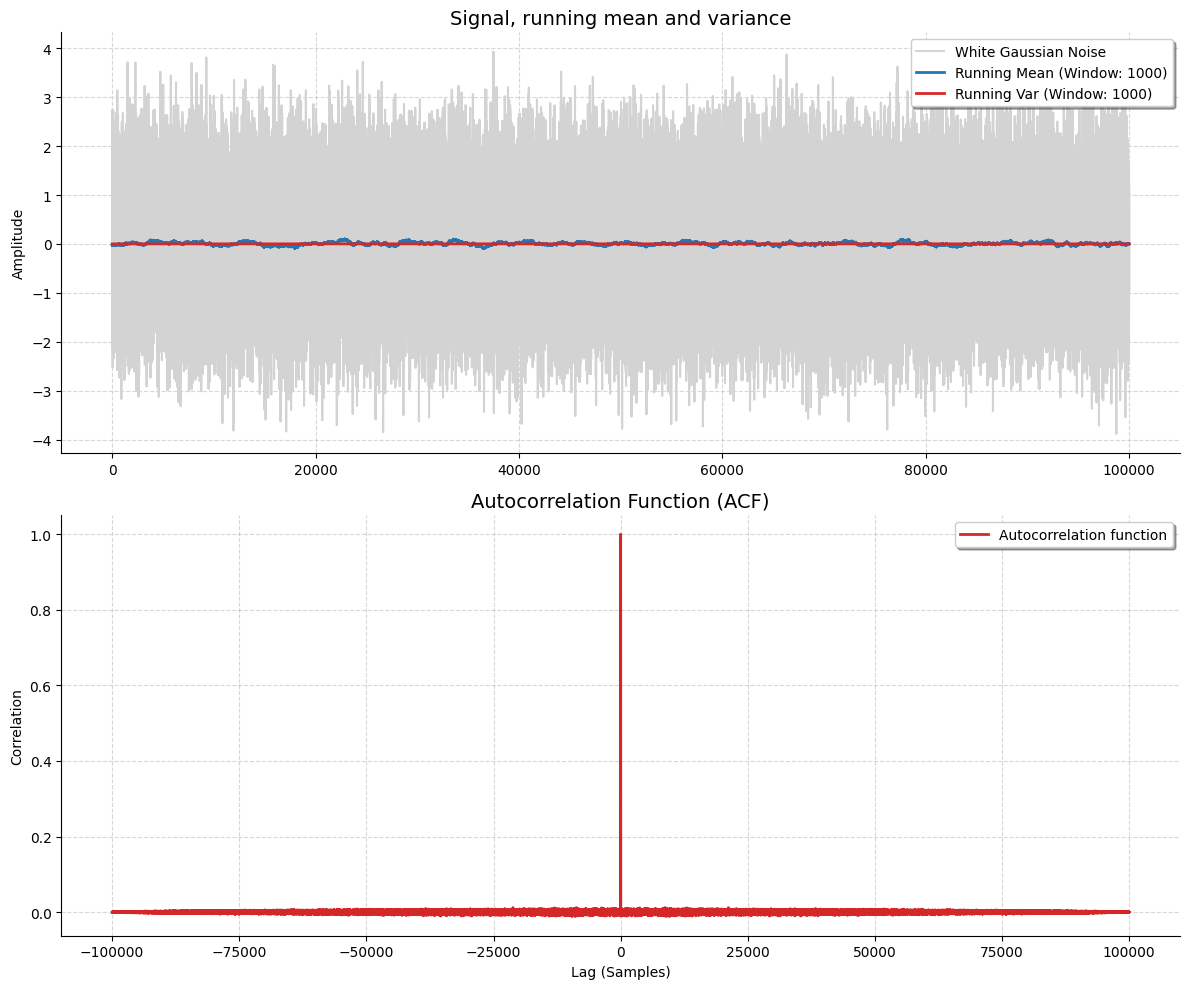

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(wgn, color='lightgray', alpha=1, label='White Gaussian Noise')
ax1.plot(running_mean, color='tab:blue', linewidth=2, label=f'Running Mean (Window: {WINDOW_SIZE})')
ax1.plot(running_var, color='tab:red', linewidth=2, label=f'Running Var (Window: {WINDOW_SIZE})')
ax1.set_title('Signal, running mean and variance', fontsize=14)
ax1.set_ylabel('Amplitude')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', frameon=True, shadow=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.plot(lags, acf, color='tab:red', linewidth=2, label='Autocorrelation function')
ax2.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax2.set_xlabel('Lag (Samples)')
ax2.set_ylabel('Correlation')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', frameon=True, shadow=True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Non-stationary signals

### Heteroscedastic white noise

A Heteroscedastic White Noise signal where the mean remains constant at zero, but the standard deviation grows linearly with time:$$X_t = \sigma_t \cdot \epsilon_t, \quad \text{where} \quad \sigma_t \propto t$$where $\epsilon_t \sim \mathcal{N}(0, 1)$.

This case is tricky because while the condition for the mean is not violated, the variance is growing, so the signal is not WSS.

In [72]:
indices = np.arange(0, N)
het_wn = np.random.randn(N) * indices * 0.2 # 0.2 here is to make the variance to grow slower
running_mean = moving_average_convolve(het_wn, WINDOW_SIZE)
acf, lags = autocorrelate(het_wn)
running_var = mov_var_convolve(het_wn, WINDOW_SIZE)

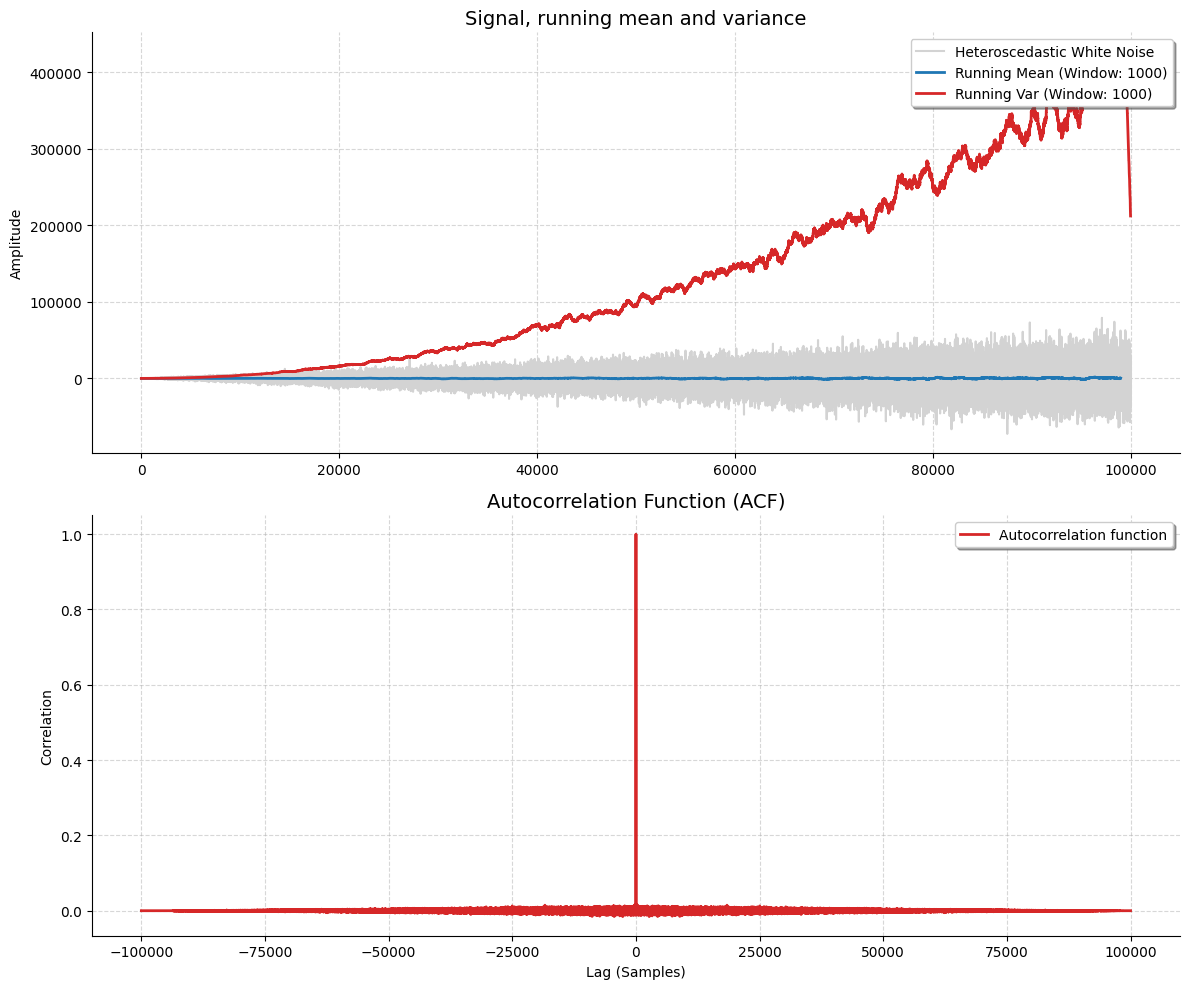

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(het_wn, color='lightgray', alpha=1, label='Heteroscedastic White Noise')
ax1.plot(running_mean, color='tab:blue', linewidth=2, label=f'Running Mean (Window: {WINDOW_SIZE})')
ax1.plot(running_var, color='tab:red', linewidth=2, label=f'Running Var (Window: {WINDOW_SIZE})')
ax1.set_title('Signal, running mean and variance', fontsize=14)
ax1.set_ylabel('Amplitude')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', frameon=True, shadow=True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.plot(lags, acf, color='tab:red', linewidth=2, label='Autocorrelation function')
ax2.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax2.set_xlabel('Lag (Samples)')
ax2.set_ylabel('Correlation')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', frameon=True, shadow=True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()